In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from random import randint

In [323]:
img = cv2.imread('para2.jpeg',0)

In [288]:
cv2.imshow('',thresh1)
cv2.waitKey(0)

-1

In [330]:
ret, thresh1 = cv2.threshold(img, 90, 255, cv2.THRESH_BINARY) 

In [309]:
kernel = np.ones((3,3), np.uint8) 
img_dilation = cv2.dilate(thresh1, kernel, iterations=1) 
img_erosion = cv2.erode(img, kernel, iterations=1) 

In [310]:
x = [i for i in range(1,thresh1.shape[1]+1)]

In [311]:
y = [i for i in range(1,thresh1.shape[0]+1)]

In [338]:
img = np.asarray(cv2.bitwise_not(thresh1))
img = img//255

In [313]:
arr = [0 for i in range(img.shape[1])]

In [339]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        arr[j] += img[i][j]

In [340]:
ar2 = [0 for i in range(img.shape[0])]

In [341]:
for j in range(img.shape[1]):
    for i in range(img.shape[0]):
        ar2[i] += img[i][j]

In [317]:
img.shape[0]

578

<BarContainer object of 1280 artists>

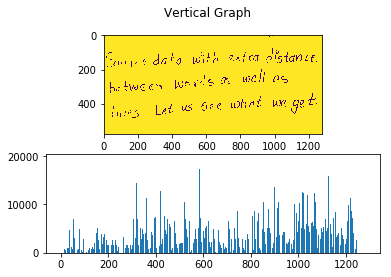

In [342]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertical Graph')
axs[0].imshow(thresh1)
axs[1].bar(x,arr)

<BarContainer object of 578 artists>

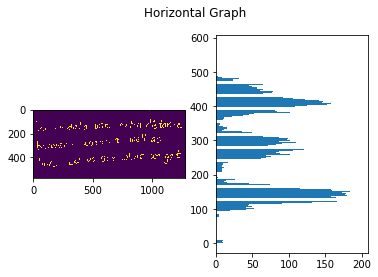

In [343]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontal Graph')
ax1.imshow(img)
ax2.barh(y,ar2)

In [337]:
im = cv2.resize(thresh1,(220,175))
cv2.imshow('',im)
cv2.waitKey(0)

-1

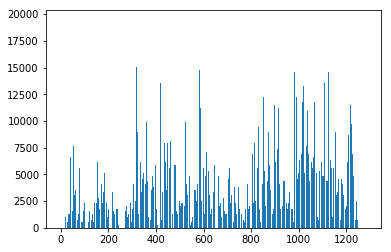

In [319]:
plt.bar(x,arr) 
# Show plot 
plt.show() 

In [34]:
import cv2
import numpy as np

In [184]:
large = cv2.imread('para2.jpeg')
rgb = cv2.pyrDown(large)
small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

In [192]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (51, 51))
grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, kernel)

In [193]:
_, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [194]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 1))
connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
# using RETR_EXTERNAL instead of RETR_CCOMP
contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [195]:
mask = np.zeros(bw.shape, dtype=np.uint8)

In [196]:
for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx])
    mask[y:y+h, x:x+w] = 0
    if hierarchy[0,idx,3] == -1:
        cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)

    if r > 0.45 and w > 5 and h > 5:
        cv2.rectangle(rgb, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)

In [201]:
cv2.imshow(' ',rgb)
cv2.waitKey(0)

-1

In [199]:
areas = [cv2.contourArea(c) for c in contours]
max_index = np.argmax(areas)
cnt=contours[max_index]

In [200]:
x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(rgb,(x,y),(x+w,y+h),(0,255,0),2)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [140, 142, 143],
        ...,
        [120, 121, 125],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[113, 118, 127],
        [122, 127, 135],
        [126, 129, 137],
        ...,
        [119, 115, 120],
        [118, 114, 119],
        [118, 114, 119]],

       [[113, 118, 127],
        [122, 127, 136],
        [125, 129, 138],
        ...,
        [118, 114, 119],
        [117, 113, 118],
        [117, 113, 118]],

       [[111, 115, 126],
        [119, 124, 133],
        [123, 126, 135],
        ...,
        [118, 114, 119],
        [117, 113, 118],
        [118, 114, 119]]